<a href="https://colab.research.google.com/github/Anweshasen98/Network-Analysis-of-Global-Airline-Connectivity/blob/main/USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNITED STATES OF AMERICA

In [ ]:
import networkx as nx
from mpl_toolkits.basemap import Basemap as Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# IMPORTING FLIGHT DATA FOR ALL COUNTRIES
flight_df = pd.read_excel("Flight Data.xlsx")

In [ ]:
flight_df.shape

(60470, 7)

In [ ]:
flight_df.head().append(flight_df.tail())

C:\Users\parin\AppData\Local\Temp\ipykernel_11980\872444083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flight_df.head().append(flight_df.tail())


,Source,Source City,Source Country,Target,Target City,Target Country,Weight
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864
1,PXO,Porto Santo,Portugal,FNC,Funchal,Portugal,9864
2,AEP,Buenos Aires,Argentina,MVD,Montevideo,Uruguay,1463
3,MVD,Montevideo,Uruguay,AEP,Buenos Aires,Argentina,1463
4,AEP,Buenos Aires,Argentina,ROS,Rosario (AR),Argentina,2261
60465,PFO,Paphos,Cyprus,LCA,Larnaca,Cyprus,945
60466,ATH,Athens (GR),Greece,TIA,Tirana,Albania,128
60467,TIA,Tirana,Albania,ATH,Athens (GR),Greece,128
60468,PRN,Pristina,Yugoslavia,TIA,Tirana,Albania,208
60469,TIA,Tirana,Albania,PRN,Pristina,Yugoslavia,208


In [ ]:
flight_df.isna().sum()

Source            0
Source City       0
Source Country    0
Target            0
Target City       0
Target Country    0
Weight            0
dtype: int64

In [ ]:
#Airport Data of All Countries

airport_df = pd.read_csv("Airports.csv",index_col=None, header=0, encoding='latin-1')

airport_df.shape

(9033, 5)

In [ ]:
airport_df.head().append(airport_df.tail())

C:\Users\parin\AppData\Local\Temp\ipykernel_11980\2339724627.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airport_df.head().append(airport_df.tail())


,id,label,country,Lat,Lon
0,BIN,Bamyan,Afghanistan,34.800000,67.816667
1,BST,Lashkar Gah,Afghanistan,31.582998,64.360000
2,CCN,Chaghcharan,Afghanistan,34.516701,65.250001
3,DAZ,Darwaz,Afghanistan,38.466667,70.883333
4,FAH,Farah,Afghanistan,32.391730,62.096819
9028,MJW,Mahenye,Zimbabwe,-21.116667,32.383333
9029,MVZ,Masvingo,Zimbabwe,-20.059617,30.820020
9030,UTA,Mutare,Zimbabwe,-18.970019,32.650038
9031,VFA,Victoria Falls,Zimbabwe,-17.929617,25.840014
9032,WKI,Hwange,Zimbabwe,-18.370004,26.500026


In [ ]:
airport_df.isna().sum()

id         0
label      0
country    0
Lat        0
Lon        0
dtype: int64

# USA- NODES AND EDGES

In [ ]:
#edges = pd.DataFrame(columns = ['Source', 'Source City','Source Country','Target','Target City','Target Country','Weight'])
#Country = "USA";

#for i, row in flight_df.iterrows():

#     if flight_df.loc[i].at["Source Country"] == Country and flight_df.loc[i].at["Target Country"] == Country :

#          new_row = flight_df.iloc[[i]]

#          edges = pd.concat([edges,new_row], ignore_index =True)

In [ ]:
edges_us=pd.read_excel("Flight_Data_USA.xlsx")

edges_us.shape

(13263, 8)

In [ ]:
edges_us.head()

,Unnamed: 0,Source,Source City,Source Country,Target,Target City,Target Country,Weight
0,0,SOV,Seldovia,USA,KEB,Nanwalek,USA,144
1,1,HOM,Homer,USA,SOV,Seldovia,USA,184
2,2,SOV,Seldovia,USA,HOM,Homer,USA,40
3,3,PGM,Port Graham,USA,HOM,Homer,USA,144
4,4,KEB,Nanwalek,USA,PGM,Port Graham,USA,144


In [ ]:
edges_us = edges_us.groupby(['Source','Target']).sum('Weight').reset_index()

edges_us.shape

(5856, 4)

In [ ]:
edges_us.head().append(edges_us.tail())

C:\Users\parin\AppData\Local\Temp\ipykernel_11980\1303000446.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edges_us.head().append(edges_us.tail())


,Source,Target,Unnamed: 0,Weight
0,ABE,ALB,2549,988
1,ABE,ATL,4070,6200
2,ABE,AVP,2612,266
3,ABE,CLE,5131,2518
4,ABE,CLT,10965,3720
5851,YAK,CDV,2346,2356
5852,YAK,JNU,2441,2356
5853,YKM,SEA,2057,7955
5854,YUM,LAX,10012,2760
5855,YUM,PHX,6726,5291


In [ ]:
Graph = nx.from_pandas_edgelist(
    df= edges_us ,
    source = 'Source',
    target = 'Target',
    edge_attr = 'Weight' ,
    create_using = nx.DiGraph())


In [ ]:
#Nodes_Graph = Graph.nodes()
#Nodes_Graph = pd.DataFrame(Nodes_Graph)

#nodes_usa = pd.DataFrame(columns = ['id','label','country','Lat','Lon'])
#nodes_usa['id'] = Nodes_Graph

###dataframe nodes_usa and nodes_graph should have same values in "id" column

#for i, row in nodes_usa.iterrows():

#    for j, row in airport_df.iterrows():

#        if nodes_usa.loc[i].at["id"] == airport_df.loc[j].at["id"]:

#            nodes_usa.loc[i].at["label"] = airport_df.loc[j].at["label"]
#            nodes_usa.loc[i].at["country"] = airport_df.loc[j].at["country"]
#            nodes_usa.loc[i].at["Lat"] = airport_df.loc[j].at["Lat"]
#            nodes_usa.loc[i].at["Lon"] = airport_df.loc[j].at["Lon"]
#            break

##nodes_usa.to_excel("nodes_usa.xlsx")

In [ ]:
nodes_usa=pd.read_excel('nodes_usa.xlsx')

nodes_usa.shape

(663, 6)

In [ ]:
nodes_usa.head()

,Unnamed: 0,id,label,country,Lat,Lon
0,0,ABE,Allentown/Bethlehem/Easton,United States,40.652222,-75.440278
1,1,ALB,Albany (US) NY,United States,42.733333,-73.800000
2,2,ATL,Atlanta,United States,33.636667,-84.428056
3,3,AVP,Wilkes-Barre,United States,41.338333,-75.723333
4,4,CLE,Cleveland,United States,41.416667,-81.850000


In [ ]:
nodes_usa.isna().sum()

Unnamed: 0     0
id             0
label         13
country       13
Lat           13
Lon           13
dtype: int64

In [ ]:
no_zero = nodes_usa[["Lat","Lon"]]

for col in no_zero:

    mean = nodes_usa[col].mean(skipna = True)
    nodes_usa[col]= nodes_usa[col].replace(np.nan, mean)

In [ ]:
nodes_usa.isna().sum()

Unnamed: 0     0
id             0
label         13
country       13
Lat            0
Lon            0
dtype: int64

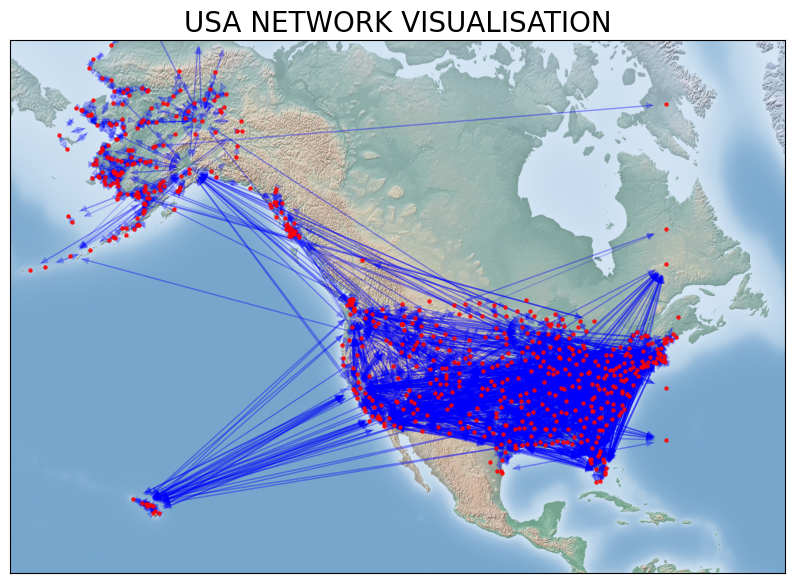

In [ ]:
# USING BASE-MAP LIBRARY TO DRAW THE NETWORK GRAPH USING LAT-LONG COORDINATES OF AIRPORTS

plt.figure(figsize = (10,9))

m = Basemap(
         projection='merc',
         llcrnrlon=-180,
         llcrnrlat=10,
         urcrnrlon=-50,
         urcrnrlat=70,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)


lat= nodes_usa['Lat'].values

lon= nodes_usa['Lon'].values

mx, my = m(lon,lat)
pos = {}

for count, elem in enumerate (nodes_usa['id']):
    pos[elem] = (mx[count], my[count])


nx.draw_networkx_nodes(G = Graph,  pos = pos,
                        node_color = 'r', alpha = 0.8,
                      node_size = 5 )
nx.draw_networkx_edges(G = Graph, pos = pos, edge_color='b',
                        alpha=0.2, arrows = True)





#m.bluemarble()
#m.drawcoastlines()
#plt.tight_layout()
#m.etopo()
m.shadedrelief()

plt.title('USA NETWORK VISUALISATION', fontsize=20)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/USA_Network.png", format = "png", dpi = 300)

plt.show()


# PLOTS

In [ ]:
import networkx as nx
from mpl_toolkits.basemap import Basemap as Basemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# IMPORTING FLIGHT DATA FOR ALL COUNTRIES-- EDGES
flight_df = pd.read_excel("Flight Data.xlsx")

#Airport Data of All Countries--NODES
airport_df = pd.read_csv("Airports.csv",index_col=None, header=0, encoding='latin-1')



In [ ]:
#NODES_USA

airport_us = airport_df[(airport_df['country'] == "United States")]


# NODES List
airport_us_id = airport_us[airport_us['country'] == 'United States']['id'].unique().tolist()




In [ ]:
airport_us.shape

(1974, 5)

In [ ]:
#EDGES_USA

flight_us = flight_df[flight_df['Source'].isin(airport_us_id) & flight_df['Target'].isin(airport_us_id)]

flight_us =  pd.DataFrame(flight_us.groupby(['Source','Target']).sum().reset_index())




In [ ]:
flight_us.shape

(5817, 3)

In [ ]:
Graph = nx.from_pandas_edgelist(
    df= flight_us ,
    source = 'Source',
    target = 'Target',
    edge_attr = 'Weight' ,
    create_using = nx.DiGraph())


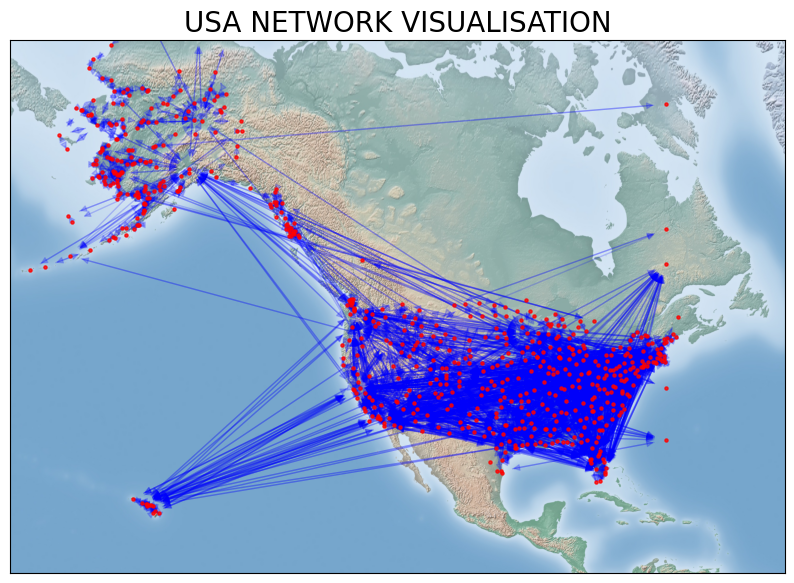

In [ ]:
# USING BASE-MAP LIBRARY TO DRAW THE NETWORK GRAPH USING LAT-LONG COORDINATES OF AIRPORTS

plt.figure(figsize = (10,9))

m = Basemap(
         projection='merc',
         llcrnrlon=-180,
         llcrnrlat=10,
         urcrnrlon=-50,
         urcrnrlat=70,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)


lat= airport_us['Lat'].values

lon= airport_us['Lon'].values

mx, my = m(lon,lat)
pos = {}

for count, elem in enumerate (airport_us['id']):
    pos[elem] = (mx[count], my[count])


nx.draw_networkx_nodes(G = Graph,  pos = pos,
                        node_color = 'r', alpha = 0.8,
                      node_size = 5 )
nx.draw_networkx_edges(G = Graph, pos = pos, edge_color='b',
                        alpha=0.2, arrows = True)





#m.bluemarble()
#m.drawcoastlines()
#plt.tight_layout()
#m.etopo()
m.shadedrelief()

plt.title('USA NETWORK VISUALISATION', fontsize=20)

#plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/USA_Network.png", format = "png", dpi = 300)

plt.show()


# Degree distribution (x-axis: descending rank, y-axis: logscale of weighted degree

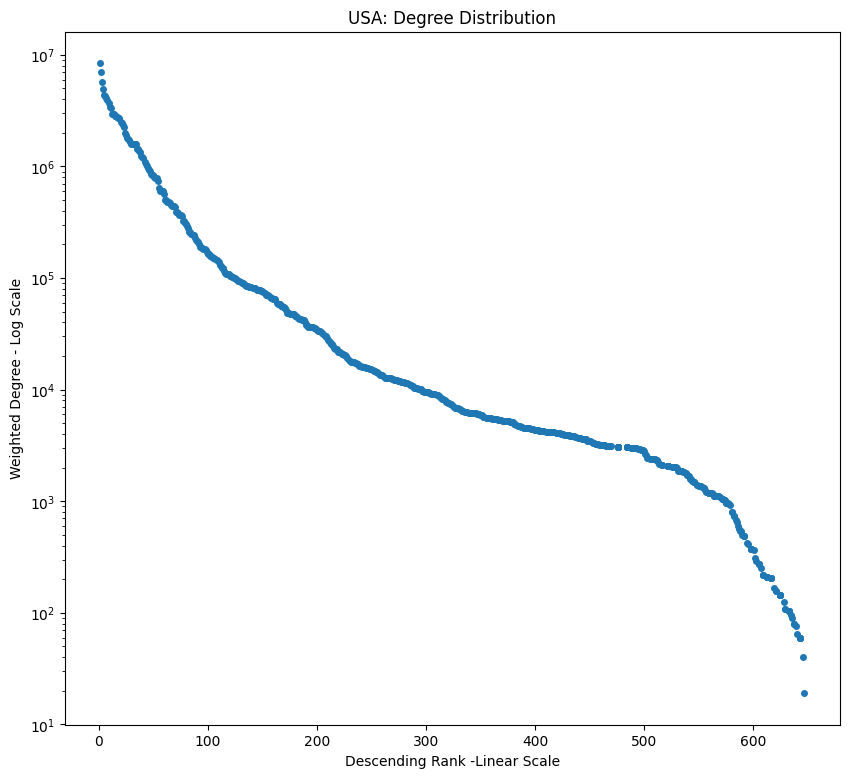

In [ ]:
#degrees in descending order ---convert to log scale and plot on y axis

degree_weighted =Graph.degree(weight="Weight")
degree_sorted_yaxis= sorted([ d for n,d in degree_weighted],reverse=True)

#X-axis- Descending Rank
degree_sorted_xaxis = pd.DataFrame(degree_sorted_yaxis).rank(ascending = False).values.tolist()

plt.figure(figsize = (10,9))

plt.xlabel('Descending Rank -Linear Scale', )
plt.xscale("linear")

plt.ylabel("Weighted Degree - Log Scale")
plt.yscale("log")

plt.title('USA: Degree Distribution')

plt.plot( degree_sorted_xaxis,degree_sorted_yaxis,'o', markersize=4)

#plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Degree_Distribution_USA.png", format = "png", dpi = 300)

plt.show()


# DEGREE vs BETWEENNESS DISTRIBUTION

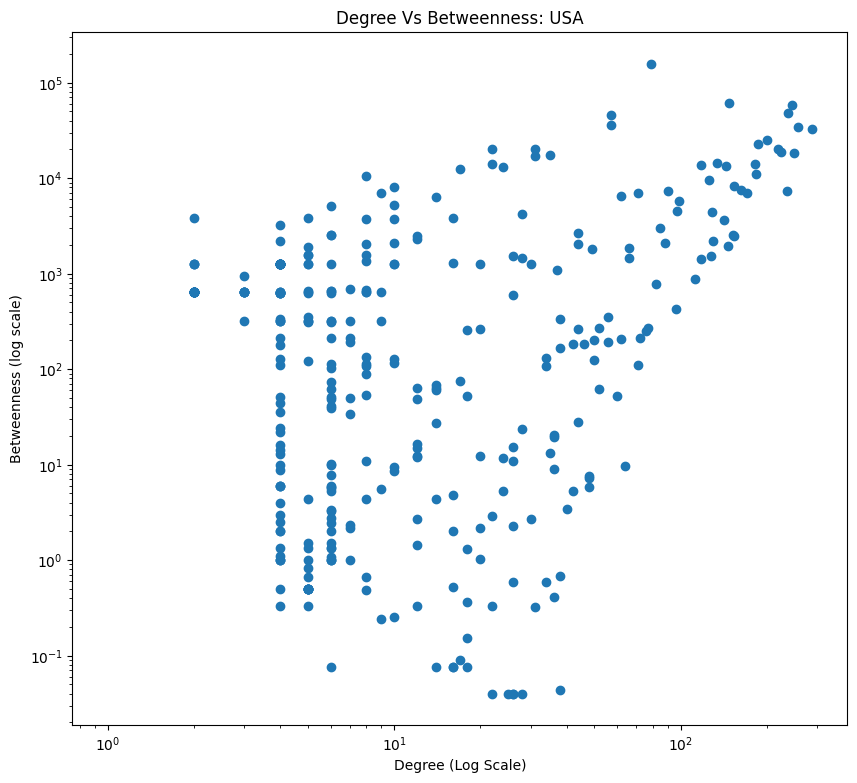

In [ ]:
deg_xaxis= [d for n, d in sorted(Graph.degree())]

bet = list(nx.betweenness_centrality(Graph,normalized= False).items())
bet_yaxis = [d for n,d in sorted(bet, reverse=False)]


plt.figure(figsize = (10,9))

plt.xlabel('Degree (Log Scale)')
plt.xscale("log")

plt.ylabel('Betweenness (log scale)')
plt.yscale("log")

plt.title('Degree Vs Betweenness: USA')
plt.plot(deg_xaxis, bet_yaxis,'o', markersize= 6)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Betweenness_Distribution_USA.png", format = "png", dpi = 300)

plt.show()


# ASSORTATIVITY

(array([560.,  39.,  14.,   6.,   9.,   7.,   4.,   2.,   5.,   1.]),
 array([  1. ,  29.7,  58.4,  87.1, 115.8, 144.5, 173.2, 201.9, 230.6,
        259.3, 288. ]),
 <BarContainer object of 10 artists>)

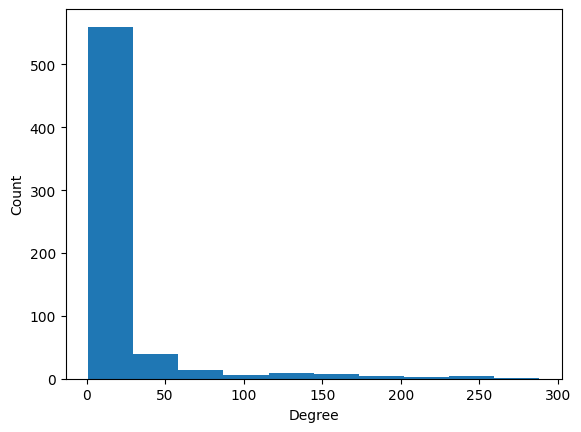

In [ ]:
#DEGREE HISTOGRAM- USA

degree_weighted =Graph.degree()
degree_sorted_axis= sorted([ d for n,d in degree_weighted],reverse=True)



plt.xlabel("Degree")

plt.ylabel("Count")
plt.hist(degree_sorted_axis)

In [ ]:
# ASSORTATIIVITY (DEG PEARSON CORR COEFF)

nx.degree_pearson_correlation_coefficient(Graph)

-0.22328856376975204

In [ ]:
nx.degree_assortativity_coefficient(Graph)

-0.22328856376974965

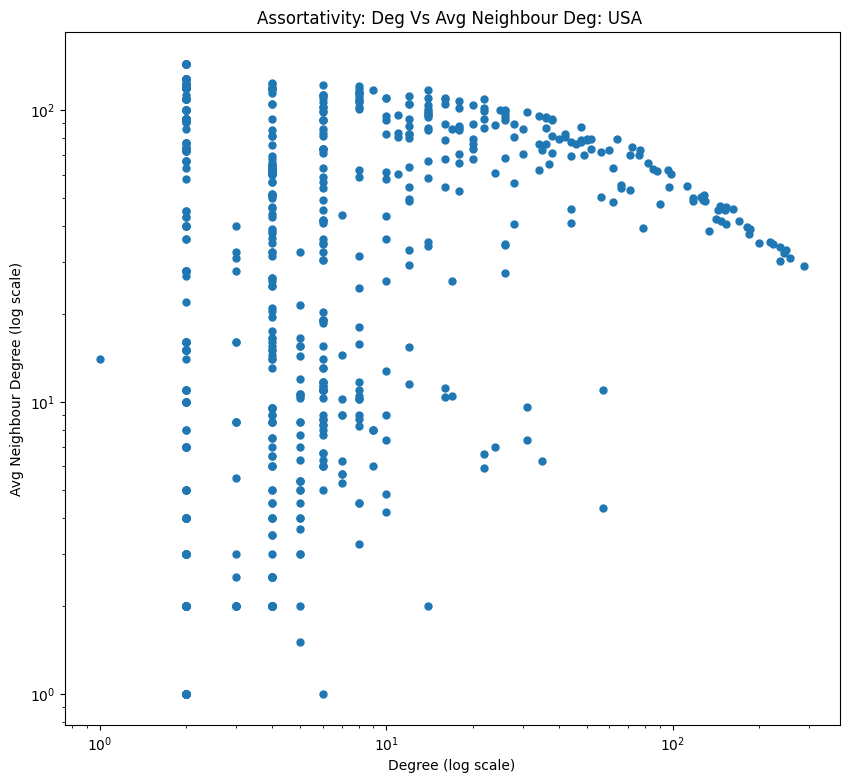

In [ ]:
# ASSORTATIIVITY  (DEG VS AVG NEIGHBOURS DEG)

deg_xaxis= [d for n, d in sorted(Graph.degree())]


avg_ngbr_deg = list(nx.average_neighbor_degree(Graph).items())
avg_ngbr_axis = [d for n,d in sorted(avg_ngbr_deg,reverse=False)]

plt.figure(figsize = (10,9))

plt.xlabel('Degree (log scale)')
plt.xscale("log")

plt.ylabel('Avg Neighbour Degree (log scale)')
plt.yscale("log")

plt.title('Assortativity: Deg Vs Avg Neighbour Deg: USA ')

plt.plot(deg_xaxis,avg_ngbr_axis, 'o',  markersize=5)

plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Assortativity_USA.png", format = "png", dpi = 300)

plt.show()

# CORE COMMUNITY

In [ ]:
# CORE COMMUNITY SIZE

core_community = nx.k_core(Graph)
Core_community_size = len(core_community)
Core_community_size

38

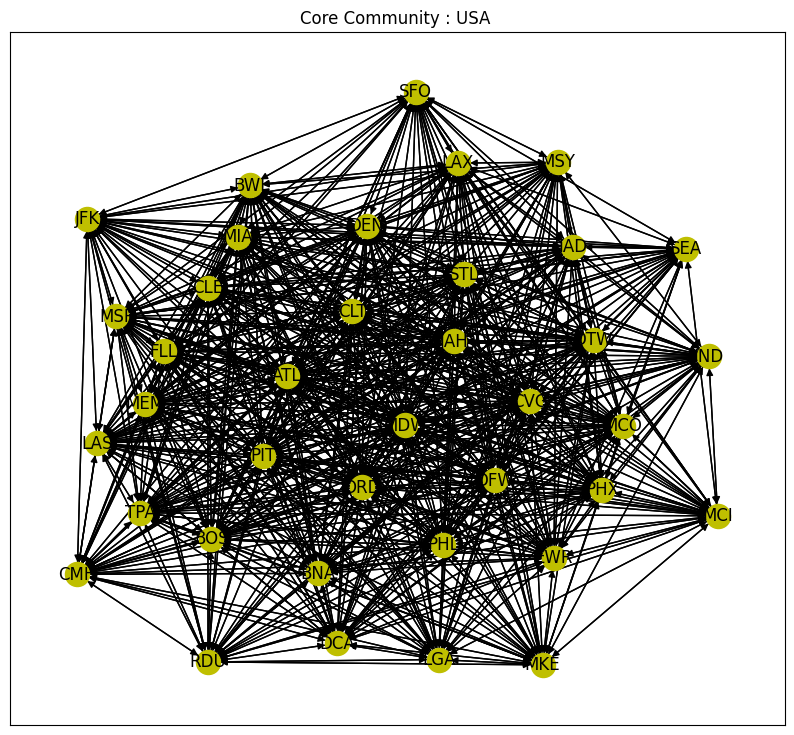

In [ ]:
# CORE COMMUNITY PLOT
plt.figure(figsize = (10,9))
nx.draw_networkx(core_community, node_color="y")


plt.title('Core Community : USA ')
#plt.savefig("C:/Users/parin/Desktop/DATA ANALYTICS ASSIGNMENT/Core Community_USA.png", format = "png", dpi = 300)

plt.show()

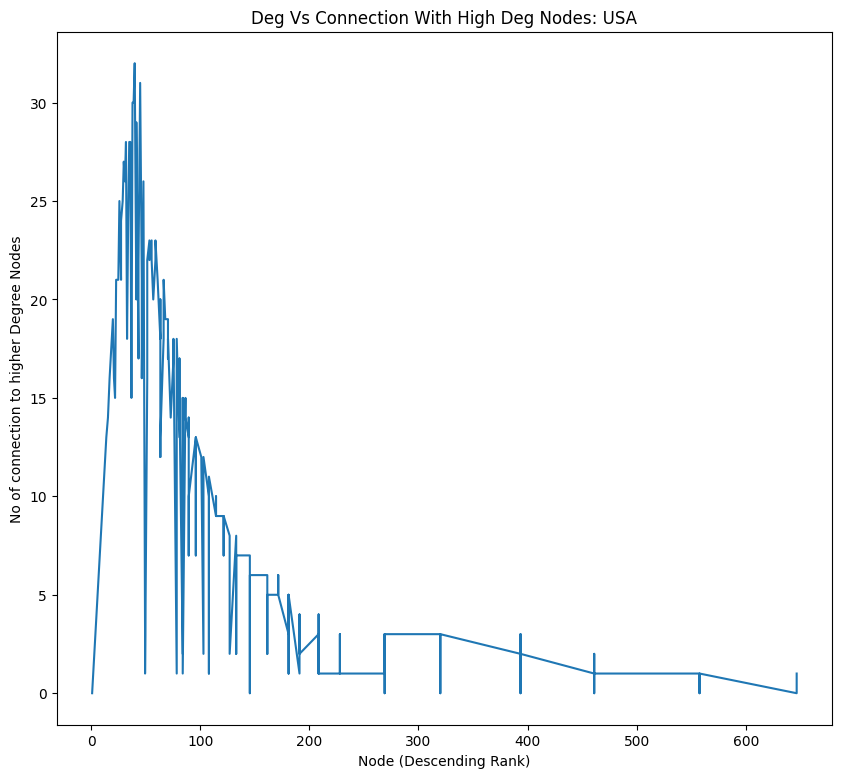

In [ ]:
# NODE-DEG VS CONNECTIONN WITH HIGHER DEG NODES PLOT

nodes_deg = pd.DataFrame([(n,d) for (n,d) in sorted(Graph.degree, key=lambda x: x[1], reverse=True)])
nodes_deg = nodes_deg.rename({0:'node',1:'degree'},axis = 1)
nodes_deg['rank'] = nodes_deg['degree'].rank(ascending=False)

hi_deg_ngbrs_list= []

for node in nodes_deg['node'] :

    hi_deg_ngbrs = 0

    for n in Graph.neighbors(node):

        if nodes_deg[nodes_deg['node'] == n].iloc[0]['degree'] > nodes_deg[nodes_deg['node'] == node].iloc[0]['degree'] :

            hi_deg_ngbrs = hi_deg_ngbrs +1

    hi_deg_ngbrs_list.append( hi_deg_ngbrs)




deg = sorted([d for n, d in Graph.degree], reverse=True)
deg_rank_axis = pd.DataFrame(deg).rank(ascending = False).values.tolist()

hi_deg_ngbrs_axis = hi_deg_ngbrs_list

plt.figure(figsize = (10,9))
plt.plot(deg_rank_axis,hi_deg_ngbrs_axis)
plt.title('Deg Vs Connection With High Deg Nodes: USA')
plt.xlabel('Node (Descending Rank)')
plt.ylabel('No of connection to higher Degree Nodes')
plt.xscale("linear")
plt.yscale("linear")

plt.savefig('DegVsHighDegConnections_USA.png')

Text(0, 0.5, 'Unit Distance')

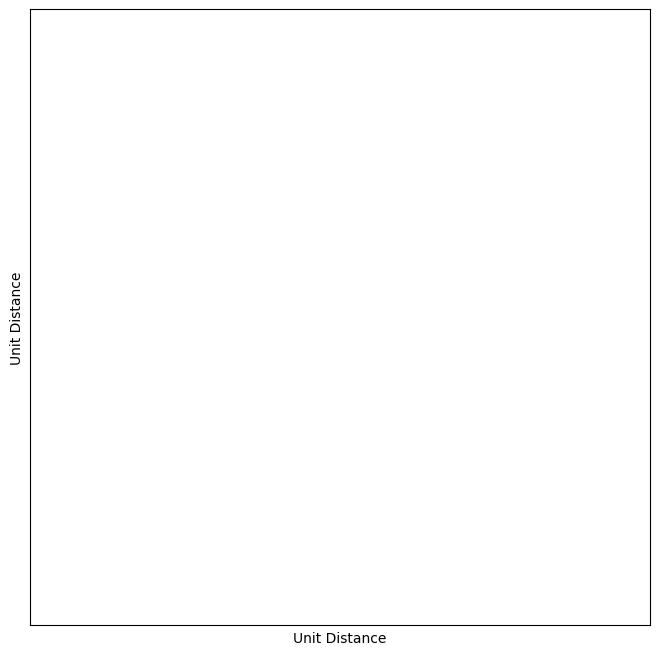

In [ ]:
import random

#unipos= {i:(random.uniform(0,1), random.uniform(0,1)) for i in range (n)}
#alphas=[2,4,6]

fig, ax1= plt.subplots(figsize=(8,8))

Graph = nx.from_pandas_edgelist(
    df= flight_us ,
    source = 'Source',
    target = 'Target',
    edge_attr = 'Weight' ,
    create_using = nx.DiGraph())


nx.draw_networkx_nodes(G = Graph,  pos = pos,
                        node_color = 'r', alpha = 0.8,
                      node_size = 5 )
nx.draw_networkx_edges(G = Graph, pos = pos, edge_color='b',
                        alpha=0.2, arrows = True)

ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-.05, 1.05])

ax1.set_xlabel("Unit Distance")
ax1.set_ylabel("Unit Distance")